## O que é regressão logística

Regressão logística pode ser definido como uma técnica estatística que busca produzir (usando um conjunto de observações) um modelo que possibilita predizer os valores tomados por uma variável categórica. Traduzindo isso pra uma linguagem mais simples, podemos dizer que a regressão logística é parecido com a regressão linear, no entanto, quando falamos de regressão linear o valor de Y assume um valor específico, já na regressão logística temos a variável Y assumindo um valor Binário (0 – fracasso / 1 – sucesso). Essa técnica é recomendada para situações onde a variável dependente é binária.

Portanto, podemos concluir que Regressão Logística busca estimar a probabilidade da variável dependente assumir um determinado valor em função dos outros valores.

## Quais são as vantagens de usar regressão logística?

Existem algumas vantagens em usar esse tipo de regressão, entre elas:

* Os resultados são mostrados em formato de probabilidade.
* É bastante fácil classificar indivíduos em categorias.
* Precisa apenas de um pequeno número de suposições para realizar as predições.
* Possui um alto grau de confiabilidade dos resultados.

## Exemplos práticos de utilização da regressão logística

Apesar de parecer algo muito inacessível, a regressão logística é bastante utilizada em ciências médicas e sociais. Podem existir também outros nomes: modelo logístico, modelo logit, ou classificador de máxima entropia.

No campo da medicina é possível determinar determinar os conjunto de fatores que torna um grupo de indivíduos doentes quando comparamos com indivíduos saudáveis. Por exemplo, imagine que temos uma variável chamada (0 – saudável | 1 – doente), usando a regressão é possível analisar quais conjuntos de fatores (obesidade, tabagismo, genética, etc.) pode alterar essa variável.

Agora imagine que você é dono de uma seguradora, seria bem interessante conseguir determinar quais são os fatores que mais influenciam no acontecimento de acidentes. Outra faceta desse problema acontece muito em instituições financeiras, com esse tipo de algoritmo você poderia detectar os grupos de risco para a subscrição de um crédito.

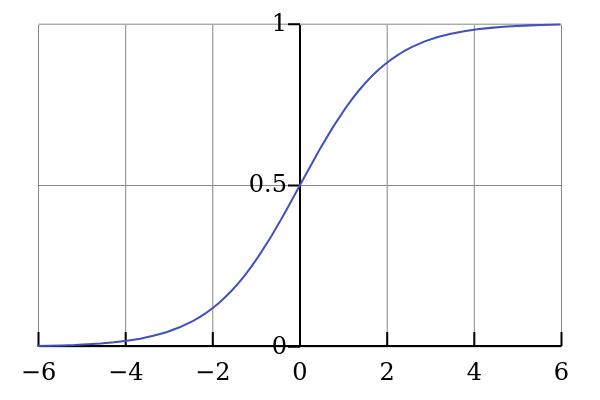

## Exemplo de regressão logística em python

Para mostrar um exemplo simples de como a regressão logística pode ser usada, vamos utilizar um dataset bastante pequeno. Abaixo, temos uma tabela mostrando se um aluno será admitido ou não em um programa de pós-graduação. Os parâmetros são notas da POSCOMP (0 – 100), pontuação em testes de inglês (0 – 10), número de artigos publicados (inteiros) e por fim se ele foi admitido (1) ou não (0).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/dados.xlsx')
df.head()

,POSCOMP,Inglês,Artigos publicados,Admitido
0,89,8,5,1
1,39,5,1,0
2,40,2,1,0
3,14,1,0,0
4,26,4,1,0


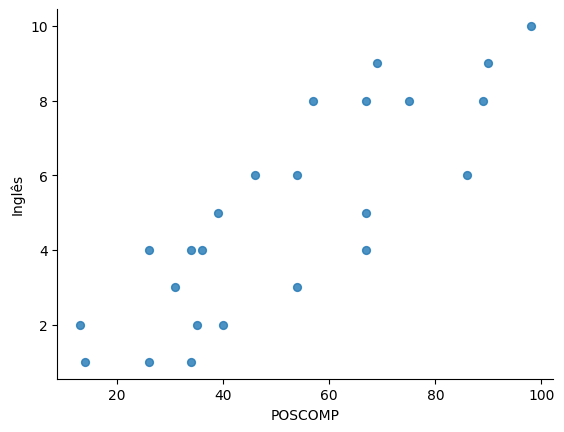

In [ ]:
# @title POSCOMP vs Inglês

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='POSCOMP', y='Inglês', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = df[['POSCOMP', 'Inglês','Artigos publicados']]
y = df['Admitido']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 0])

In [ ]:
y_test

11    0
10    1
22    1
14    0
20    1
1     0
Name: Admitido, dtype: int64

<Axes: xlabel='Predicted', ylabel='Actual'>

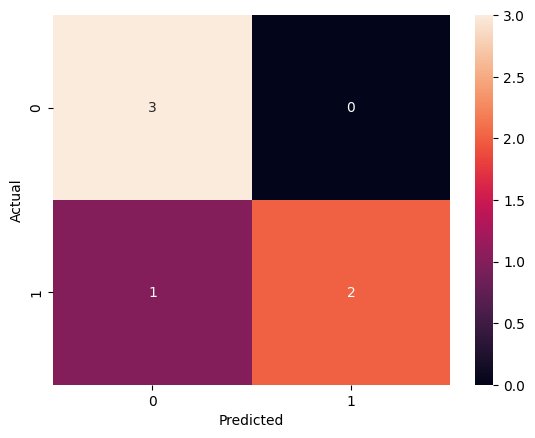

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8333333333333334


## Tá, mas o que isso significa?

Bom, com todo esse código nós conseguimos prever com 83% de acurácia se você entraria ou não em um programa de pós-graduação baseado nesses parâmetros. Imagine por exemplo que você tirou 65 na POSCOMP, possui um inglês intermediário (6) e 2 artigos publicados.

In [ ]:
teste = {'POSCOMP': 50, 'Inglês': 6, 'Artigos publicados': 2}
dft = pd.DataFrame(data = teste,index=[0])
print(dft)
resultado = logistic_regression.predict(dft)
probabilidade = logistic_regression.predict_proba(dft)
print("Resuldado: ",resultado)
print("Probabilidade Positiva: ", probabilidade[0][1])

   POSCOMP  Inglês  Artigos publicados
0       50       6                   2
Resuldado:  [0]
Probabilidade Positiva:  0.018117704055994926
